In [194]:
# Nobile-Hernday Lab, Bioinformatics Workshopp (Feb 19, 2019)
# R language
# Written by Sabah Ul-Hasan

# 9:30 - 10:30 AM (Arrive at 9:30 AM if you already reached this stage from the tutorial or Checkpoint E)
# Corresponding Github repository (written by Sabah Ul-Hasan and Akshay Paropkari)
# https://github.com/sabahzero/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019

In [ ]:
# The following walks through two biological replicates for CAY540 RNA-Seq treatment data 
# We create a) barchart with standard deviation, b) heatmap for replicates, c) dendogram for ntar genes as (Figure 1)
# Have ideas for what you would add or condense? 
# Don't see a figure here that you'd like to see? 
# Scroll to the very bottom and use that section to write-up your own versions, be sure to save the file
# We can merge these into a master 'lab notebook' at the end of the tutorial time (10:30 AM)

In [195]:
# RNA-Seq data for heatmap (courtesy of Austin Perry)
# Upload and view the data

library(curl) # This function calls the curl package, which allows us the ability to download data from online 

# The read.csv function reads in our data. In this case, two biological replicates for CAY540
# Your file must be in .csv format to load
CAY540_Rep1 = read.csv(curl("https://raw.githubusercontent.com/sabahzero/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/master/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep1.csv"))
CAY540_Rep2 = read.csv(curl("https://raw.githubusercontent.com/sabahzero/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/master/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep2.csv"))

# Let's say we don't have a GitHub account for our data. 
# Guess what! Since we also uploaded this repository directly in our notebook, we can load it through this route
# Notice the difference in path inside of the ""
CAY540_Rep1_computer = read.csv("~/Desktop/Nobile-HerndayLabs_BioinformaticsWorkshop_Feb19-2019/Data_RNA-Seq_DE-Output/normalized_counts_CAY540_Rep1.csv")

# Lets look at these data
head(CAY540_Rep1) # The head function shows the first five rows of our datasheet

X,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540_1.FWD_C_albicans__SC5314__,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540P_1.FWD_C_albicans__SC5314__
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


In [196]:
head(CAY540_Rep2) # This is the view of our second replicate

X,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540_2.FWD_C_albicans__SC5314__,DEA_Sexual_Biofilms_Clinical_Isolates_CAY540P_2.FWD_C_albicans__SC5314__
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


In [197]:
# We have three variables. Variable or column X is the gene name
# These genes are annotated via DEseq
# Question for Akshay et al: How do we include results of genes that aren't annotated? 

# The 2nd column or variable is our control, the 3rd column or variable is our treatment
# Which genes are down-regulated vs up-regulated from our control? 

## First, we want to merge these two replicates such that we get the mean and standard deviation
# We need to relabel our columns for both datasets so we can merge them
library(data.table) # We will need this package to use the re-name function

names(CAY540_Rep1)[1]<-"Gene" # Since the column names are so long, we can re-label by column number 
names(CAY540_Rep2)[1]<-"Gene" # Replicate 2

names(CAY540_Rep1)[2]<-"Control_Rep1" # We want to keep these column names unique so we can show the variation
names(CAY540_Rep2)[2]<-"Control_Rep2"  

names(CAY540_Rep1)[3]<-"Test_Rep1" 
names(CAY540_Rep2)[3]<-"Test_Rep2"  

# Let's check that both datasets have the same column names
head(CAY540_Rep1)
head(CAY540_Rep2)

# Now we'll merge the dataset by Gene name
CAY540 <- merge(CAY540_Rep1, CAY540_Rep2, by="Gene")
head(CAY540)

# You can write this as a .csv and play with it through the API on http://microscopebioinformatics.org
write.csv(CAY540, file = "CAY540.csv")

# Let's remove all genes where all 4 columns = 0 and make that a new dataset
CAY540_Positive = CAY540[!(CAY540$Control_Rep1==0 & CAY540$Test_Rep1==0 & CAY540$Control_Rep1==0 & CAY540$Test_Rep2==0),]
head(CAY540_Positive) # notice this creates a new column numbering the resulting genes

Gene,Control_Rep1,Test_Rep1
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


Gene,Control_Rep2,Test_Rep2
ERCC-00002,0,0
ERCC-00003,0,0
ERCC-00004,0,0
ERCC-00009,0,0
ERCC-00012,0,0
ERCC-00013,0,0


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
ERCC-00002,0,0,0,0
ERCC-00003,0,0,0,0
ERCC-00004,0,0,0,0
ERCC-00009,0,0,0,0
ERCC-00012,0,0,0,0
ERCC-00013,0,0,0,0


,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000
94,its2,245.314449,203.257493,280.117289,381.697255
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849


In [198]:
# Now let's create two columns that show the subtracted result for test-control as new columns
CAY540_Positive$Rep1 = CAY540_Positive$Test_Rep1 - CAY540_Positive$Control_Rep1 # Treatment - control  for rep 1
CAY540_Positive$Rep2 = CAY540_Positive$Test_Rep2 - CAY540_Positive$Control_Rep2

head(CAY540_Positive) # ta-da! 

,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000,-1.0528517,0.0000000
94,its2,245.314449,203.257493,280.117289,381.697255,-42.0569563,101.5799659
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386,-121.7012155,18.3249634
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236,4.7713551,2.3530352
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774,3.0778531,-6.0167795
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849,-0.5152517,-0.4743519


In [199]:
# Let's calculate the mean and standard deviation for these replicates
CAY540_Positive$Rep_mean = rowMeans(CAY540_Positive[c('Rep1', 'Rep2')]) # calculate mean
CAY540_Positive$Rep_SDev = apply(CAY540_Positive[,7:8], 1, sd) # calculate for 1 standard devation (+/-)

head(CAY540_Positive)

,Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev
18,ERCC-00035,1.052852,0.000000,0.000000,0.000000,-1.0528517,0.0000000,-0.5264259,0.37223929
94,its2,245.314449,203.257493,280.117289,381.697255,-42.0569563,101.5799659,29.7615048,50.78332087
96,NOVEL-Ca21chr1-002,214.781750,93.080534,72.151423,90.476386,-121.7012155,18.3249634,-51.6881260,49.50673033
98,NOVEL-Ca21chr1-004,9.475665,14.247021,4.244201,6.597236,4.7713551,2.3530352,3.5621951,0.85500522
99,NOVEL-Ca21chr1-005,7.369962,10.447815,11.671554,5.654774,3.0778531,-6.0167795,-1.4694632,3.21543820
100,NOVEL-Ca21chr1-007,5.264259,4.749007,4.244201,3.769849,-0.5152517,-0.4743519,-0.4948018,0.01446027


In [200]:
# Let's organize this datasheet a little futher, and re-number the number of genes accordingly

CAY540_Positive = CAY540_Positive %>% arrange(Rep_SDev) # orders your data by standard deviation, updates dataset

library("tidyverse") # We will need this package to use the filter function
CAY540_Positive = CAY540_Positive %>% filter(Rep_SDev < 1) # removes genes with an SDev higher than 1 (not informative), updates dataset

CAY540_Positive$GeneNumber <- 1:nrow(CAY540_Positive) # Creates column for Gene number
print("genes with a result that isn't 0:")
max(CAY540_Positive$GeneNumber) # 1000 genes with a positive result and SDev > 1
print("number of unique genes:")
length(unique(CAY540_Positive$Gene)) # validate check that each is a unique gene

head(CAY540_Positive)

# We can write this as a new .csv if we want (check folder to see it worked)
write.csv(CAY540_Positive, file = "CAY540_Positive.csv") # Note that you can see this folder on your personal computer or through your browser

[1] "genes with a result that isn't 0:"


[1] 1000

[1] "number of unique genes:"


[1] 1000

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
orf19.7402,121.077947,110.1769589,89.128228,78.2243756,-10.9009882,-10.9038526,-10.9024204,0.001012706,1
ntar_939,6.317110,7.5984110,13.793654,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
orf19.5711,7.369962,8.5482123,6.366302,7.5396989,1.1782503,1.1733968,1.1758236,0.001715966,3
orf19.6525,34.744107,40.8414589,29.709409,35.8135696,6.0973523,6.1041602,6.1007562,0.002406937,4
NOVEL-Ca21chr2-014,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,5
NOVEL-Ca21chr6-030,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,6


In [201]:
# We're interested in ntar genes, so let's subset for that

library(dplyr) # We will need this package for grabbing anything with the 'ntar' in the gene title

ntar_only = filter(CAY540_Positive, grepl("ntar",Gene)) # This will subset for everything ntar

print("number of ntar genes:")
length(unique(ntar_only$Gene)) # 161 of our original 1000


head(ntar_only) # notice the gene numbers are kept the same as before
# we can change this if we want, but let's keep it so we can backtrack if needed

write.csv(ntar_only, file = "CAY540_ntar.csv") # We should now have 3 .csv files in our folder

# Recap
head(CAY540) # Simply merges two replicates by gene name
head(CAY540_Positive) # Genes with a SDev < 1 between control and treatment
# Positive may not be the term you want to use. In which case, you can edit to be whatever you want. 
head(ntar_only) # ntar genes with a SDev < 1 between control and treatment

[1] "number of ntar genes:"


[1] 161

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_939,6.317110,7.5984110,13.79365,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
ntar_1373,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,7
ntar_1396,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,8
ntar_827,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,9
ntar_941,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,10
ntar_1421,1.052852,0.0000000,1.06105,0.0000000,-1.0528517,-1.0610503,-1.0569510,0.002898650,14


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
ERCC-00002,0,0,0,0
ERCC-00003,0,0,0,0
ERCC-00004,0,0,0,0
ERCC-00009,0,0,0,0
ERCC-00012,0,0,0,0
ERCC-00013,0,0,0,0


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
orf19.7402,121.077947,110.1769589,89.128228,78.2243756,-10.9009882,-10.9038526,-10.9024204,0.001012706,1
ntar_939,6.317110,7.5984110,13.793654,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
orf19.5711,7.369962,8.5482123,6.366302,7.5396989,1.1782503,1.1733968,1.1758236,0.001715966,3
orf19.6525,34.744107,40.8414589,29.709409,35.8135696,6.0973523,6.1041602,6.1007562,0.002406937,4
NOVEL-Ca21chr2-014,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,5
NOVEL-Ca21chr6-030,0.000000,0.9498014,0.000000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,6


Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_939,6.317110,7.5984110,13.79365,15.0793977,1.2813007,1.2857433,1.2835220,0.001570723,2
ntar_1373,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,7
ntar_1396,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,8
ntar_827,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,9
ntar_941,0.000000,0.9498014,0.00000,0.9424624,0.9498014,0.9424624,0.9461319,0.002594733,10
ntar_1421,1.052852,0.0000000,1.06105,0.0000000,-1.0528517,-1.0610503,-1.0569510,0.002898650,14


In [202]:
# For simplicity, let's focus on the ntar genes with a value of greater than 10 (for up- or down- regulation) 

High_ntar = ntar_only %>% filter(Rep_mean > 9.99 | Rep_mean < -9.99)

print("number of ntar genes up- or down- regulated by 10:")
length(unique(High_ntar$Gene)) # 9 of 161 ntar, out of our original 1000 with SDev < 1

head(High_ntar)

[1] "number of ntar genes up- or down- regulated by 10:"


[1] 9

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber
ntar_274,3.158555,19.94583,8.488403,25.44648,16.78727,16.95808,16.87268,0.06038951,111
ntar_52,0.000000,22.79523,20.159956,43.35327,22.79523,23.19331,22.99427,0.14074224,171
ntar_970,17.898479,63.63669,36.075711,82.93669,45.73821,46.86098,46.29959,0.39695680,521
ntar_227,90.545247,37.99205,103.982933,52.77789,-52.55319,-51.20504,-51.87912,0.47664362,588
ntar_63,66.329658,50.33947,64.724070,47.12312,-15.99019,-17.60095,-16.79557,0.56949221,629
ntar_1157,96.862358,69.33550,112.471336,86.70654,-27.52686,-25.76480,-26.64583,0.62298193,664


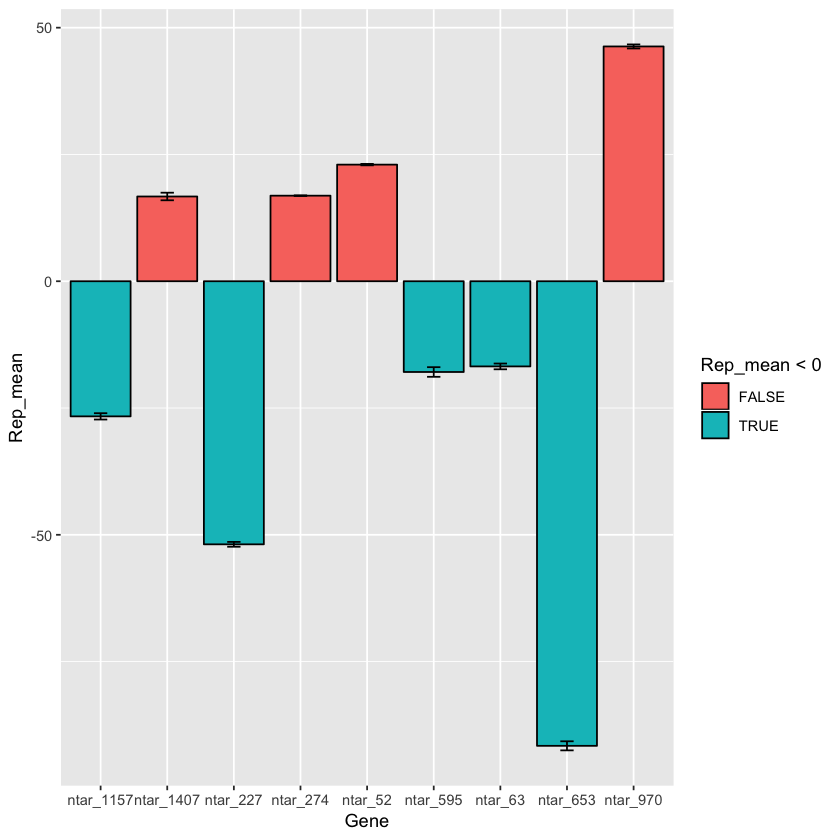

Saving 7 x 7 in image


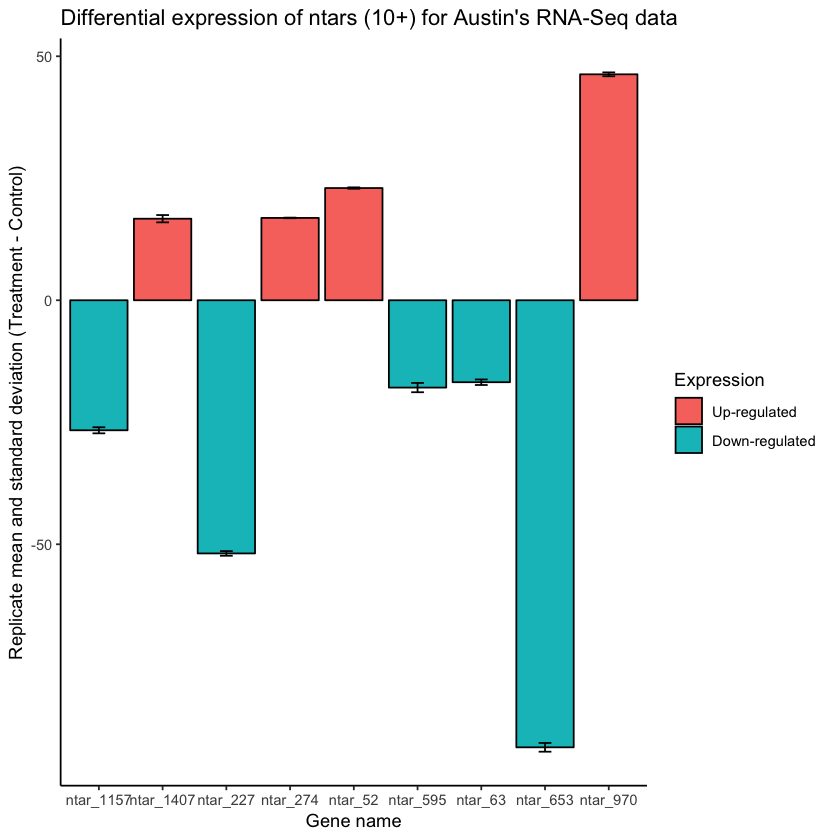

In [210]:
# Let's make our heatmap!... maybe?
# Since we already calculated our mean and standard deviation, why not make a box plot of these ntars with just 9 values?

library(ggplot2) # We'll need this package to create the graph

ntars = ggplot(High_ntar, aes(x=Gene, y=Rep_mean, fill = Rep_mean < 0)) + # data set, x and y axes, assign color to up- or down-
geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=Rep_mean-Rep_SDev, ymax=Rep_mean+Rep_SDev), width=.2,
                 position=position_dodge(.9)) 

ntars # Let's make this graph look a little nicer, and add color based on up- or down-
ntar_barchart = ntars + 
scale_fill_discrete(name  ="Expression",
                            breaks=c("FALSE", "TRUE"),
                            labels=c("Up-regulated", "Down-regulated")) +
labs(title="Differential expression of ntars (10+) for Austin's RNA-Seq data", x="Gene name", y = "Replicate mean and standard deviation (Treatment - Control)") +
theme_classic() 

ntar_barchart

ggsave("High_ntar_barchart.png", dpi = 800) # We can save this updated version as a figure
# Check your folder, it's there!

In [206]:
# Let's make our heatmap, for real this time!

# For the heatmap, we can go back to our original dataset where we merged the replicates by gene name
head(CAY540)
# Wait... that's a lot of genes
# Let's stick to the ntar genes with expression values higher than 10

# We will need to drop anything that isn't a Rep (Treatment - Control) value because this will interfere with the heatmap
Heatmap_High_ntar = High_ntar[,c(1,6:7)]
head(Heatmap_High_ntar) # Yay, we did it!

library(tidyr) # We'll need this package for assigning sample categories to our dataset
Categorized_Heatmap_High_ntar = Heatmap_High_ntar %>% gather(Treatment, Expression_Value, -Gene)
Categorized_Heatmap_High_ntar # Allows us to see whole dataset, since it's fairly small
write.csv(Categorized_Heatmap_High_ntar, file = "CAY540_ntar-heatmap.csv") # Saves this as a .csv

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2
ERCC-00002,0,0,0,0
ERCC-00003,0,0,0,0
ERCC-00004,0,0,0,0
ERCC-00009,0,0,0,0
ERCC-00012,0,0,0,0
ERCC-00013,0,0,0,0


Gene,Rep1,Rep2
ntar_274,16.78727,16.95808
ntar_52,22.79523,23.19331
ntar_970,45.73821,46.86098
ntar_227,-52.55319,-51.20504
ntar_63,-15.99019,-17.60095
ntar_1157,-27.52686,-25.76480


Gene,Treatment,Expression_Value
ntar_274,Rep1,16.78727
ntar_52,Rep1,22.79523
ntar_970,Rep1,45.73821
ntar_227,Rep1,-52.55319
ntar_63,Rep1,-15.99019
ntar_1157,Rep1,-27.52686
ntar_1407,Rep1,15.65372
ntar_653,Rep1,-90.34908
ntar_595,Rep1,-16.55013
ntar_274,Rep2,16.95808


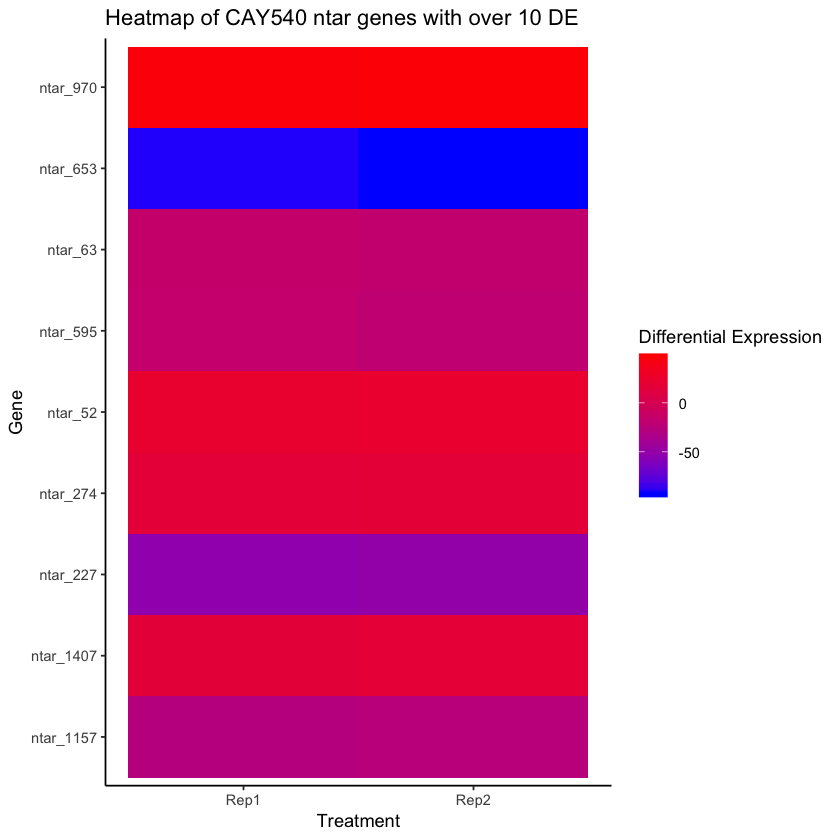

In [207]:
# View heatmap 

ntar_heatmap = ggplot(Categorized_Heatmap_High_ntar, aes(x = Treatment, y = Gene, fill = Expression_Value)) + 
geom_tile() +
scale_fill_gradient(name = "Differential Expression", # it's better to normalize these to 1, for now it's fine
                      low = "blue", # assigns down-regulated as blue
                      high = "red") + # assigns up-regulated as red
ggtitle(label = "Heatmap of CAY540 ntar genes with over 10 DE") +
theme_classic()

ntar_heatmap # Note you can adjust this to directly include the controls and treatments, here we show the difference 

# How do we make a dendogram of the ntar genes, and add it to the heatmap?

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber,ntar
ntar_274,3.158555,19.94583,8.488403,25.44648,16.78727,16.95808,16.87268,0.06038951,111,1
ntar_52,0.000000,22.79523,20.159956,43.35327,22.79523,23.19331,22.99427,0.14074224,171,2
ntar_970,17.898479,63.63669,36.075711,82.93669,45.73821,46.86098,46.29959,0.39695680,521,3
ntar_227,90.545247,37.99205,103.982933,52.77789,-52.55319,-51.20504,-51.87912,0.47664362,588,4
ntar_63,66.329658,50.33947,64.724070,47.12312,-15.99019,-17.60095,-16.79557,0.56949221,629,5
ntar_1157,96.862358,69.33550,112.471336,86.70654,-27.52686,-25.76480,-26.64583,0.62298193,664,6
ntar_1407,14.739924,30.39364,26.526258,44.29573,15.65372,17.76947,16.71160,0.74803149,833,7
ntar_653,263.212928,172.86385,223.881621,131.00227,-90.34908,-92.87935,-91.61422,0.89458692,928,8
ntar_595,52.642586,36.09245,54.113567,34.87111,-16.55013,-19.24246,-17.89630,0.95188107,952,9


Warning message in dist(ntar_dendrogram):
“NAs introduced by coercion”

Gene,Control_Rep1,Test_Rep1,Control_Rep2,Test_Rep2,Rep1,Rep2,Rep_mean,Rep_SDev,GeneNumber,ntar
ntar_274,3.158555,19.94583,8.488403,25.44648,16.78727,16.95808,16.87268,0.06038951,111,1
ntar_52,0.000000,22.79523,20.159956,43.35327,22.79523,23.19331,22.99427,0.14074224,171,2
ntar_970,17.898479,63.63669,36.075711,82.93669,45.73821,46.86098,46.29959,0.39695680,521,3
ntar_227,90.545247,37.99205,103.982933,52.77789,-52.55319,-51.20504,-51.87912,0.47664362,588,4
ntar_63,66.329658,50.33947,64.724070,47.12312,-15.99019,-17.60095,-16.79557,0.56949221,629,5
ntar_1157,96.862358,69.33550,112.471336,86.70654,-27.52686,-25.76480,-26.64583,0.62298193,664,6
ntar_1407,14.739924,30.39364,26.526258,44.29573,15.65372,17.76947,16.71160,0.74803149,833,7
ntar_653,263.212928,172.86385,223.881621,131.00227,-90.34908,-92.87935,-91.61422,0.89458692,928,8
ntar_595,52.642586,36.09245,54.113567,34.87111,-16.55013,-19.24246,-17.89630,0.95188107,952,9


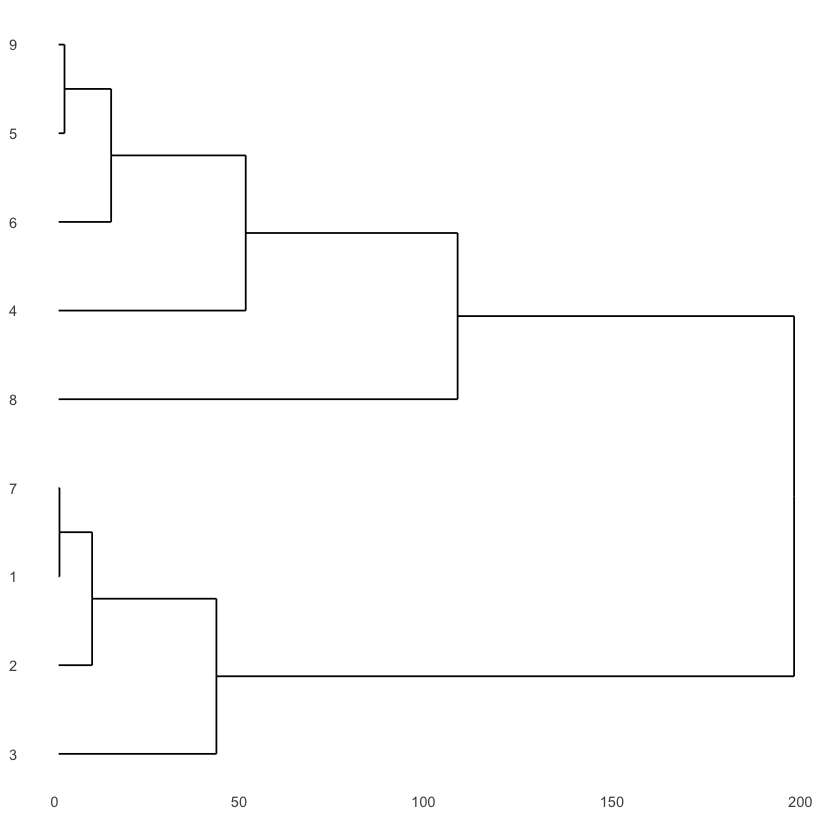

In [209]:
# install.packages("ggdendro") # Note that you have to install this package because it's not automatically included in the notebook kernel
library(ggdendro) # We will need this for the dendrogram

High_ntar

ntar_dendrogram = (High_ntar[,c(1,8)]) # We want to create a dendogram based on the mean value for replicates
hc <- hclust(dist(ntar_dendrogram)) # this caculates the distance and output a hiearchical cluster
ntar_dendro = ggdendrogram(hc, rotate = TRUE, size = 2) # this outputs our dendogram, but our genes are numbered instead of labeled
ntar_dendro

High_ntar$ntar <- 1:nrow(High_ntar) # Creates column for Gene number (for our dendogram)
High_ntar # Now we can see which ntar genes correspond to what
 
write.csv(High_ntar, file = "CAY540_ntar-heatmap-dendrogram-key.csv") # Saves this as a .csv (5 total in folder)

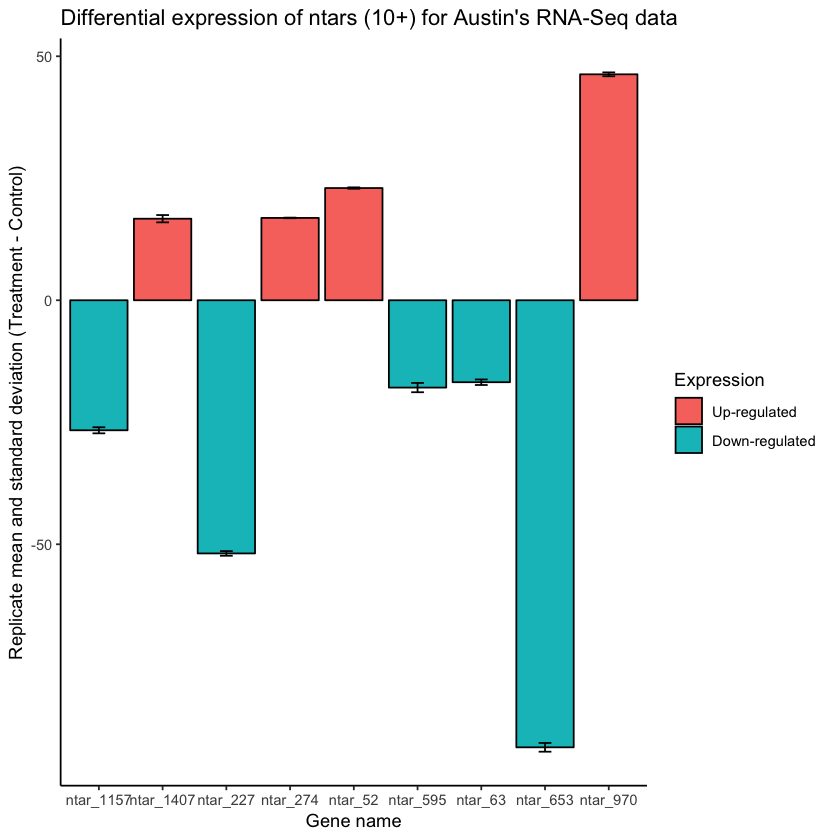

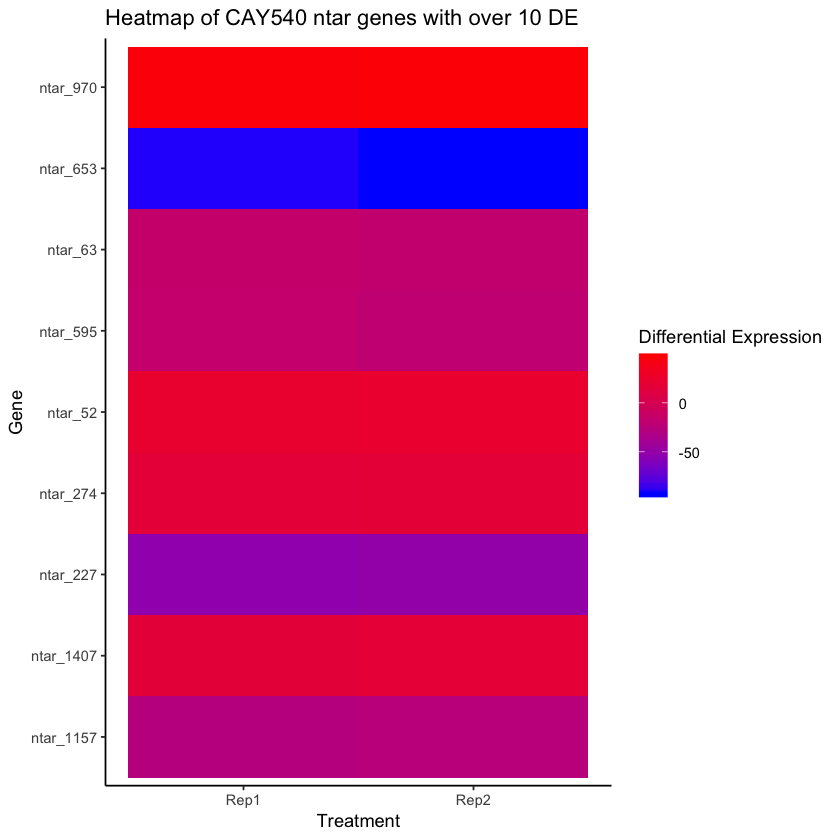

Gene,Rep1,Rep2,Rep_mean,Rep_SDev,ntar
ntar_274,16.78727,16.95808,16.87268,0.06038951,1
ntar_52,22.79523,23.19331,22.99427,0.14074224,2
ntar_970,45.73821,46.86098,46.29959,0.39695680,3
ntar_227,-52.55319,-51.20504,-51.87912,0.47664362,4
ntar_63,-15.99019,-17.60095,-16.79557,0.56949221,5
ntar_1157,-27.52686,-25.76480,-26.64583,0.62298193,6
ntar_1407,15.65372,17.76947,16.71160,0.74803149,7
ntar_653,-90.34908,-92.87935,-91.61422,0.89458692,8
ntar_595,-16.55013,-19.24246,-17.89630,0.95188107,9


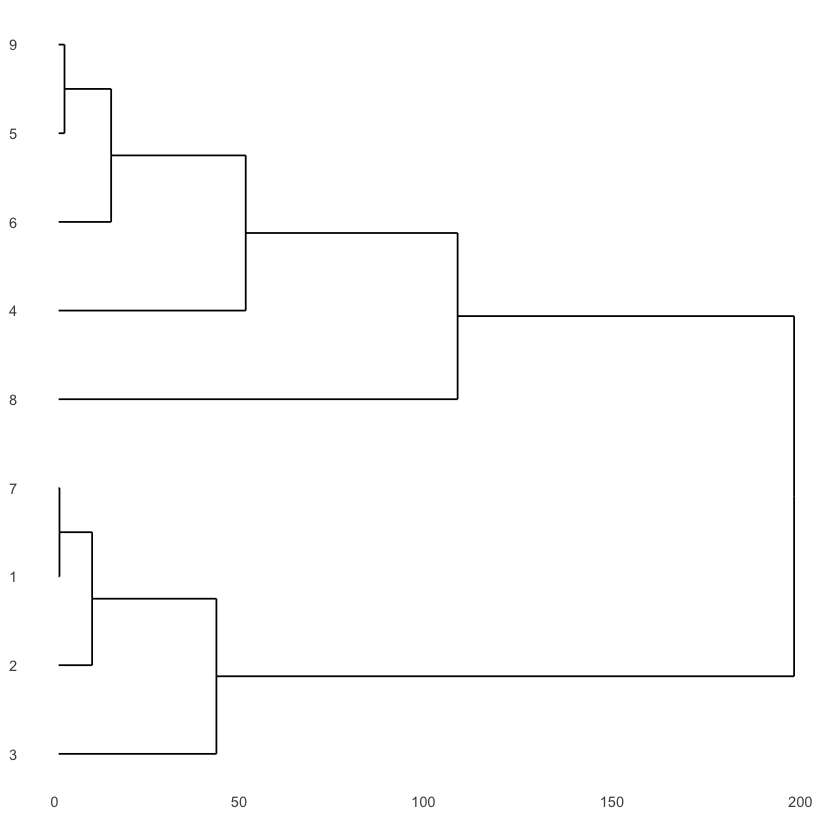

In [213]:
# How can we create a figure that includes all this information together? (barcart, heatmap, dendogram, key)

# Summary
ntar_barchart
ntar_heatmap
ntar_dendro

ntar_legend = (High_ntar[,c(1,6:9,11)]) # Creates table as our legend reference
ntar_legend

Saving 7 x 7 in image


       Gene      Rep1      Rep2  Rep_mean   Rep_SDev ntar
1  ntar_274  16.78727  16.95808  16.87268 0.06038951    1
2   ntar_52  22.79523  23.19331  22.99427 0.14074224    2
3  ntar_970  45.73821  46.86098  46.29959 0.39695680    3
4  ntar_227 -52.55319 -51.20504 -51.87912 0.47664362    4
5   ntar_63 -15.99019 -17.60095 -16.79557 0.56949221    5
6 ntar_1157 -27.52686 -25.76480 -26.64583 0.62298193    6
7 ntar_1407  15.65372  17.76947  16.71160 0.74803149    7
8  ntar_653 -90.34908 -92.87935 -91.61422 0.89458692    8
9  ntar_595 -16.55013 -19.24246 -17.89630 0.95188107    9


Saving 7 x 7 in image


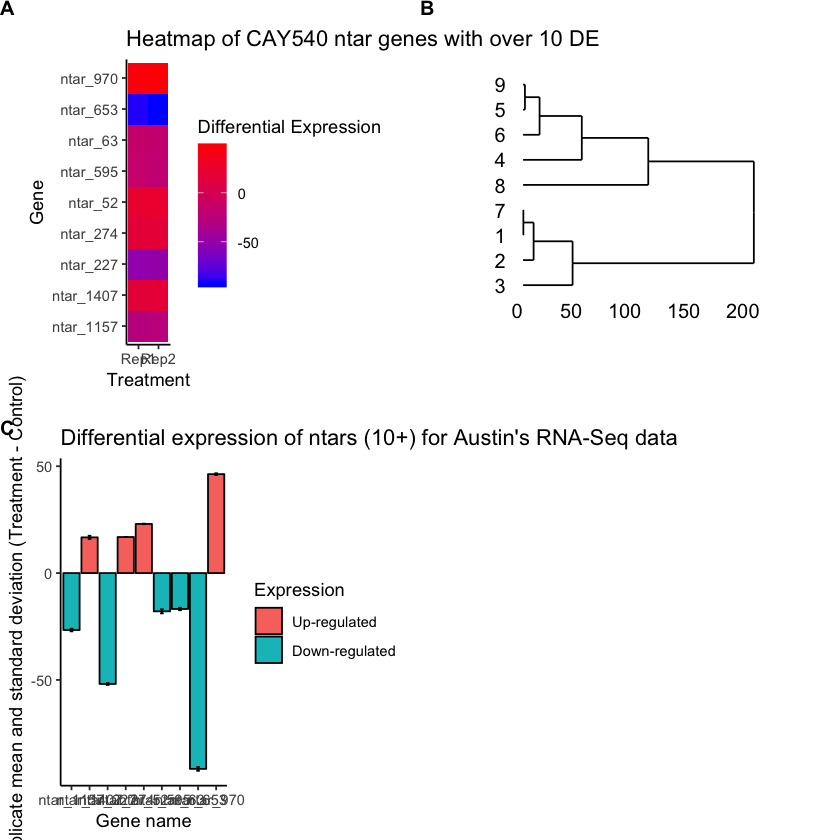

In [244]:
# install.packages("cowplot")
library(cowplot) # This package is what will allow us to merge all these into one

Figure1 = plot_grid(ntar_heatmap, ntar_dendro, ntar_barchart, labels = "AUTO", hjust = 0, vjust = 1, label_size=12,
          scale = c(0.9, 0.7, 1.)) 
Figure1 # not the prettiest... but we can always clean this up! The purpose is to have the concept down
# How would you go about adjusting this to be publish-ready?

ggsave("Figure1.png", dpi = 800)
print(ntar_legend)

In [ ]:
# That may have taken some time to go through step-by-step, but now you have this automated set-up which takes a matter of minutes produce
# Much faster than Excel!

## Section for adding your own versions
# Have ideas for what you would add or condense? 
# Don't see a figure here that you'd like to see? 
# Feel free to use this space to write-up your own versions, be sure to save the file
# We can merge these into a master 'lab notebook'